In [941]:
# convert in python script by: jupyter nbconvert --to script Visu_discrete.ipynb
# run python script by: python3 Visu_output.py --interactive=0 --printvar=-1-2- 
# or python3 Visu_output.py --interactive=0 --printvar=all (to print all variables)

# Import the necessary packages and modules
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

width_in_inches = 12
height_in_inches = 9
dots_per_inch = 100
#fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import os.path
from os import path

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

os.chdir('../output')


def print_discrete_xy(varx,vary):
    fxy_inner = varx + vary + 'inner_joint.out'
    fxy_skewed_inner = varx + vary + 'skinner_joint.out'
    fxy_skewed_outer = varx + vary + 'skouter_joint.out'
    fx_outer2 = varx + 'outer.out'
    fy_outer2 = vary + 'outer.out'
    fx_inner = varx + 'inner.out'
    fy_inner = vary + 'inner.out'
    if (path.isfile(fx_outer2) and path.isfile(fy_outer2)):
        fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
        plt.grid(True,which="both", linestyle='--')
        
        if (not path.isfile(fxy_skewed_outer)):
            with open(fx_outer2, 'r') as x_outer2, open(fy_outer2, 'r') as y_outer2:
                linesx_outer2 = x_outer2.readlines()
                xmin_outer2 = [float(line.split()[1]) for line in linesx_outer2]
                xmax_outer2 = [float(line.split()[2]) for line in linesx_outer2]
                linesy_outer2 = y_outer2.readlines()
                ymin_outer2 = [float(line.split()[1]) for line in linesy_outer2]
                ymax_outer2 = [float(line.split()[2]) for line in linesy_outer2]

                for xo1,xo2,yo1,yo2 in zip(xmin_outer2,xmax_outer2,ymin_outer2,ymax_outer2):
                    car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, color='green', ec='black', linewidth=2, alpha=0.05)
                    ax.add_patch(car_fig)
                car_fig = Rectangle([xo1,yo1],xo2-xo1,yo2-yo1, label='over-approximation', color='green', ec='black', linewidth=2, alpha=0.05)
                ax.add_patch(car_fig)
          
        if (path.isfile(fxy_skewed_outer)):
            with open(fxy_skewed_outer, 'r') as xy_skewed_outer:
                linesxy_skewed_outer = xy_skewed_outer.readlines()
                x1_outer = [float(line.split()[1]) for line in linesxy_skewed_outer]
                y1_outer = [float(line.split()[2]) for line in linesxy_skewed_outer]
                x2_outer = [float(line.split()[3]) for line in linesxy_skewed_outer]
                y2_outer = [float(line.split()[4]) for line in linesxy_skewed_outer]
                x3_outer = [float(line.split()[5]) for line in linesxy_skewed_outer]
                y3_outer = [float(line.split()[6]) for line in linesxy_skewed_outer]
                x4_outer = [float(line.split()[7]) for line in linesxy_skewed_outer]
                y4_outer = [float(line.split()[8]) for line in linesxy_skewed_outer]
                
                for xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(x1_outer,y1_outer,x2_outer,y2_outer,x3_outer,y3_outer,x4_outer,y4_outer):
                    car_fig = Polygon([(xi1,yi1), (xi2,yi2), (xi3,yi3), (xi4,yi4)], color='green', ec='black', linewidth=3,alpha=0.3)
                    ax.add_patch(car_fig)
        
        if (path.isfile(fxy_inner) and os.stat(fxy_inner).st_size != 0 ):
            with open(fxy_inner, 'r') as xy_inner:
                linesxy_inner = xy_inner.readlines()
                xmin_inner = [float(line.split()[1]) for line in linesxy_inner]
                xmax_inner = [float(line.split()[2]) for line in linesxy_inner]
                ymin_inner = [float(line.split()[3]) for line in linesxy_inner]
                ymax_inner = [float(line.split()[4]) for line in linesxy_inner]

                for xi1,xi2,yi1,yi2 in zip(xmin_inner,xmax_inner,ymin_inner,ymax_inner):
                    car_fig2 = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, color='orange', ec='black', linestyle='--', linewidth=3 ,alpha=0.5)
                    ax.add_patch(car_fig2)
                car_fig2 = Rectangle([xi1,yi1],xi2-xi1,yi2-yi1, label='under-approximation', color='orange', ec='black', linestyle='--', linewidth=3,alpha=0.3)
                ax.add_patch(car_fig2)
        
#        with open(fx_inner, 'r') as x_inner, open(fy_inner, 'r') as y_inner: 
#            linesx_inner = x_inner.readlines()
#            xmin_inner = [float(line.split()[0]) for line in linesx_inner]
#            xmax_inner = [float(line.split()[1]) for line in linesx_inner]
#            linesy_inner = y_inner.readlines()
#            ymin_inner = [float(line.split()[0]) for line in linesy_inner]
#            ymax_inner = [float(line.split()[1]) for line in linesy_inner]
#            ycenter = [(ymax+ymin)/2.0 for ymin,ymax in zip(ymin_inner,ymax_inner)]
#            xcenter = [(xmax+xmin)/2.0 for xmin,xmax in zip(xmin_inner,xmax_inner)]
#            plt.plot([xmin_inner, xmax_inner], [ycenter,ycenter], color='red', linestyle='--', linewidth=3)
#            plt.plot([xcenter,xcenter], [ymin_inner, ymax_inner], color='red', linestyle='--', linewidth=3, label='projected under-approx')

        if (path.isfile(fxy_skewed_inner)):
            with open(fxy_skewed_inner, 'r') as xy_skewed_inner:
                linesxy_skewed_inner = xy_skewed_inner.readlines()
                x1_inner = [float(line.split()[1]) for line in linesxy_skewed_inner]
                y1_inner = [float(line.split()[2]) for line in linesxy_skewed_inner]
                x2_inner = [float(line.split()[3]) for line in linesxy_skewed_inner]
                y2_inner = [float(line.split()[4]) for line in linesxy_skewed_inner]
                x3_inner = [float(line.split()[5]) for line in linesxy_skewed_inner]
                y3_inner = [float(line.split()[6]) for line in linesxy_skewed_inner]
                x4_inner = [float(line.split()[7]) for line in linesxy_skewed_inner]
                y4_inner = [float(line.split()[8]) for line in linesxy_skewed_inner]
                
                for xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(x1_inner,y1_inner,x2_inner,y2_inner,x3_inner,y3_inner,x4_inner,y4_inner):
                    car_fig = Polygon([(xi1,yi1), (xi2,yi2), (xi3,yi3), (xi4,yi4)], color='orange', ec='black', linestyle='--', linewidth=3,alpha=0.5)
                    ax.add_patch(car_fig)
                    
        if (path.isfile('xi.out')):
            with open('xi.out','r') as xi:
                lines_xi = xi.readlines()
                z1 = [float(line.split()[1]) for line in lines_xi]
                z2 = [float(line.split()[2]) for line in lines_xi]
                plt.scatter(z1,z2,c='purple',alpha=1.,s=1.,label='estimated reachable states')
    #        Z = [f(x,y) for x in np.arange(0.99,1.01,0.001) for y in np.arange(0.99,1.01,0.001)]
        
            
       
        
        #for i in range(N):
    #polygon = Polygon(np.random.rand(N, 2), True)
    #patches.append(polygon)

#colors = 100*np.random.rand(len(patches))
#p = PatchCollection(patches, alpha=0.4)
#p.set_array(np.array(colors))
#ax.add_collection(p)
#fig.colorbar(p, ax=ax)
        
        
        ax.autoscale()
        ax.set_xlabel(varx,fontsize="x-large")
        ax.set_ylabel(vary,fontsize="x-large")
#        plt.legend(fontsize="x-large",loc='center')
        plt.legend(fontsize="x-large",loc='lower right')
        f_output= varx + vary
        plt.savefig(f_output)

        
        plt.show() 
        plt.close()



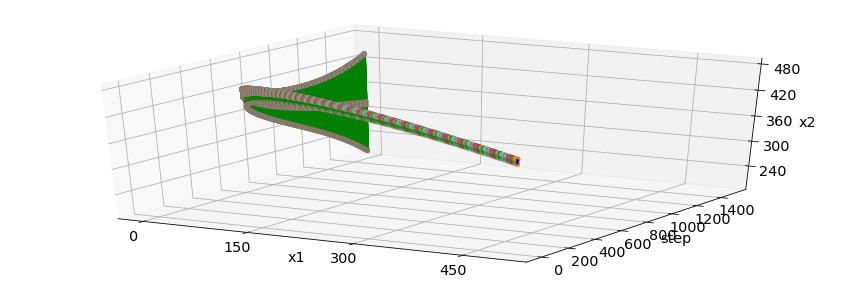

In [942]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as M3
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.ticker as mticker
#%matplotlib inline

def print3d_discrete_xy(varx,vary):
    fxy_inner = varx + vary + 'inner_joint.out'
    fxy_skewed_inner = varx + vary + 'skinner_joint.out'
    fxy_skewed_outer = varx + vary + 'skouter_joint.out'
    fx_outer2 = varx + 'outer.out'
    fy_outer2 = vary + 'outer.out'
    fx_inner = varx + 'inner.out'
    fy_inner = vary + 'inner.out'
    if (path.isfile(fx_outer2) and path.isfile(fy_outer2)):
        #fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
        fig = plt.figure()
       # ax = fig.add_subplot(1, 1, 1, projection='3d')
        ax = fig.add_subplot(111, projection='3d') #ax = fig.gca(projection='3d') ##Axes3D(fig) #fig.gca(projection='3d')
        plt.grid(True,which="both", linestyle='--')
          
        # rectangles    
        if (not path.isfile(fxy_skewed_outer)):
            with open(fx_outer2, 'r') as x_outer2, open(fy_outer2, 'r') as y_outer2:
                linesx_outer2 = x_outer2.readlines()
                t1_outer = [float(line.split()[0]) for line in linesx_outer2]
                xmin_outer2 = [float(line.split()[1]) for line in linesx_outer2]
                xmax_outer2 = [float(line.split()[2]) for line in linesx_outer2]
                linesy_outer2 = y_outer2.readlines()
                ymin_outer2 = [float(line.split()[1]) for line in linesy_outer2]
                ymax_outer2 = [float(line.split()[2]) for line in linesy_outer2]

                for t1,xo1,xo2,yo1,yo2 in zip(t1_outer,xmin_outer2,xmax_outer2,ymin_outer2,ymax_outer2):
                    Z = np.array([[xo1,t1,yo1], [xo2,t1,yo1], [xo2,t1,yo2], [xo1,t1,yo2]]) 
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='g', linewidths=2, edgecolors='g', label='maximal inner-approximation', alpha=.1))
         
        if (path.isfile(fxy_inner) and os.stat(fxy_inner).st_size != 0 ):
            with open(fxy_inner, 'r') as xy_inner:
                linesxy_inner = xy_inner.readlines()
                t1_inner = [float(line.split()[0]) for line in linesxy_inner]
                xmin_inner = [float(line.split()[1]) for line in linesxy_inner]
                xmax_inner = [float(line.split()[2]) for line in linesxy_inner]
                ymin_inner = [float(line.split()[3]) for line in linesxy_inner]
                ymax_inner = [float(line.split()[4]) for line in linesxy_inner]

                for t1,xi1,xi2,yi1,yi2 in zip(t1_inner,xmin_inner,xmax_inner,ymin_inner,ymax_inner):
                    Z = np.array([[xi1,t1,yi1], [xi2,t1,yi1], [xi2,t1,yi2], [xi1,t1,yi2]]) 
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=2, linestyle='--', edgecolors='b', label='maximal inner-approximation', alpha=.3))
         
        # skew box
        if (path.isfile(fxy_skewed_outer)):
            with open(fxy_skewed_outer, 'r') as xy_skewed_outer:
                linesxy_skewed_outer = xy_skewed_outer.readlines()
                t1_outer = [float(line.split()[0]) for line in linesxy_skewed_outer]
                x1_outer = [float(line.split()[1]) for line in linesxy_skewed_outer]
                y1_outer = [float(line.split()[2]) for line in linesxy_skewed_outer]
                x2_outer = [float(line.split()[3]) for line in linesxy_skewed_outer]
                y2_outer = [float(line.split()[4]) for line in linesxy_skewed_outer]
                x3_outer = [float(line.split()[5]) for line in linesxy_skewed_outer]
                y3_outer = [float(line.split()[6]) for line in linesxy_skewed_outer]
                x4_outer = [float(line.split()[7]) for line in linesxy_skewed_outer]
                y4_outer = [float(line.split()[8]) for line in linesxy_skewed_outer]
                patches = []
                for t1,xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(t1_outer,x1_outer,y1_outer,x2_outer,y2_outer,x3_outer,y3_outer,x4_outer,y4_outer):
                    Z = np.array([[xi1,t1,yi1], [xi2,t1,yi2], [xi3,t1,yi3], [xi4,t1,yi4]]) 
                    # plot vertices
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    # list of sides' polygons of figure
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='g', linewidths=2, edgecolors='g', label='maximal inner-approximation', alpha=.1))
                     
        
        if (path.isfile(fxy_skewed_inner)):
            with open(fxy_skewed_inner, 'r') as xy_skewed_inner:
                linesxy_skewed_inner = xy_skewed_inner.readlines()
                t1_inner = [float(line.split()[0]) for line in linesxy_skewed_outer]
                x1_inner = [float(line.split()[1]) for line in linesxy_skewed_inner]
                y1_inner = [float(line.split()[2]) for line in linesxy_skewed_inner]
                x2_inner = [float(line.split()[3]) for line in linesxy_skewed_inner]
                y2_inner = [float(line.split()[4]) for line in linesxy_skewed_inner]
                x3_inner = [float(line.split()[5]) for line in linesxy_skewed_inner]
                y3_inner = [float(line.split()[6]) for line in linesxy_skewed_inner]
                x4_inner = [float(line.split()[7]) for line in linesxy_skewed_inner]
                y4_inner = [float(line.split()[8]) for line in linesxy_skewed_inner]
                
                for t1,xi1,yi1,xi2,yi2,xi3,yi3,xi4,yi4 in zip(t1_inner,x1_inner,y1_inner,x2_inner,y2_inner,x3_inner,y3_inner,x4_inner,y4_inner):
                    Z = np.array([[xi1,t1,yi1], [xi2,t1,yi2], [xi3,t1,yi3], [xi4,t1,yi4]]) 
                    # plot vertices
                    ax.scatter3D(Z[:, 0], Z[:, 1], Z[:, 2])
                    # list of sides' polygons of figure
                    verts = [[Z[0],Z[1],Z[2],Z[3]]]
                    ax.add_collection3d(Poly3DCollection(verts, facecolors='orange', linewidths=2, linestyle='--', edgecolors='b', label='maximal inner-approximation', alpha=.3))
                  
        if (path.isfile('xi.out')):
            with open('xi.out','r') as xi:
                lines_xi = xi.readlines()
                t = [float(line.split()[0]) for line in lines_xi]
                z1 = [float(line.split()[1]) for line in lines_xi]
                z2 = [float(line.split()[2]) for line in lines_xi]
       #         ax.scatter3D(z1,t,z2,c='purple',alpha=1.,s=1.,label='estimated reachable states')
        
        
        ax.autoscale()
        ax.set_xlabel(varx,fontsize="x-large")
        ax.set_zlabel(vary,fontsize="x-large")
        ax.set_ylabel('step',fontsize="x-large")
        ax.xaxis.set_major_locator(mticker.MaxNLocator(5))
        ax.zaxis.set_major_locator(mticker.MaxNLocator(5))
       # ax.set_zlim3d(0, 25)
     #   plt.legend(fontsize="x-large",loc='center')
    #    plt.legend(fontsize="x-large",loc='lower right')
        f_output= varx + vary + 'time'
        plt.savefig(f_output)

        
        plt.show() 
        plt.close()


    
print3d_discrete_xy("x1","x2")

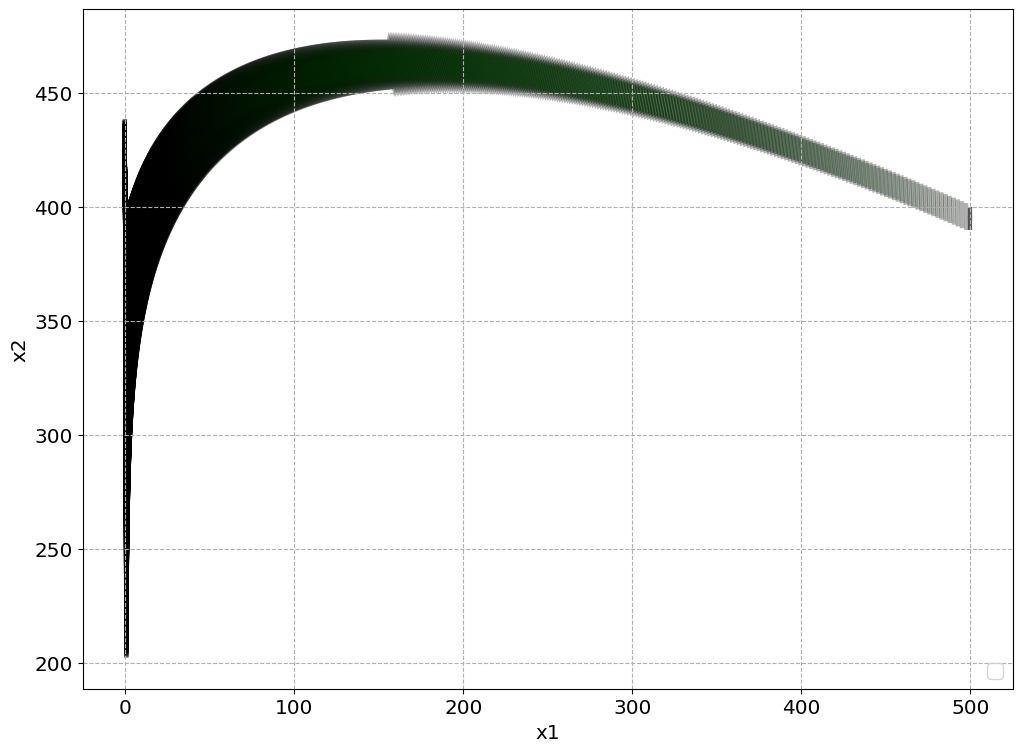

In [943]:
print_discrete_xy("x1","x2")

/Users/sylvie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py
-f
/Users/sylvie/Library/Jupyter/runtime/kernel-08412e0b-601a-440c-a6d9-adc25abd4eee.json
['x1outer.out', 'x2outer.out', 'x3outer.out', 'x4outer.out', 'x5outer.out']
['x1inner.out', 'x2inner.out', 'x3inner.out', 'x4inner.out', 'x5inner.out']


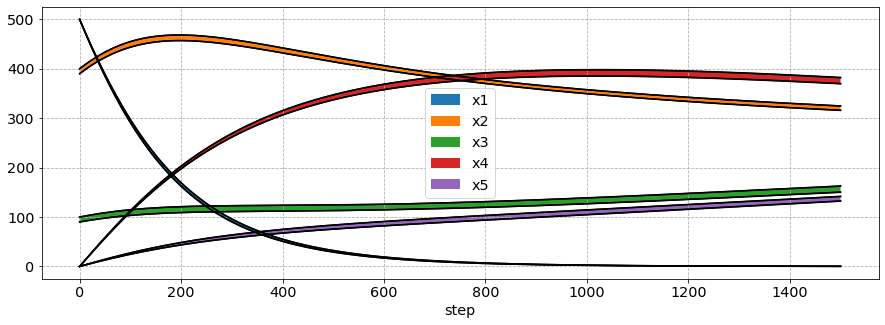

In [944]:
# for reading arguments on command line (use as a script possibly called from the program)
import sys
import re
print(sys.argv[0])
nb_arguments=len(sys.argv)
if (nb_arguments > 1):
    for i in range(1,nb_arguments):
        print(sys.argv[i])
        if re.match("--interactive=*",sys.argv[i]):
            print_interactive = int((sys.argv[i]).split( "=", 1 )[1])
        if re.match("--printvar=*",sys.argv[i]):
            variables_to_display= (sys.argv[i]).split( "=", 1 )[1]
            
os.chdir('../output')
#print(glob.glob('x*outer.out'))
filenames_outer = sorted(glob.glob('x*outer.out'))
filenames_inner = sorted(glob.glob('x*inner.out'))

print(filenames_outer)
print(filenames_inner)

fig = plt.figure()
for f_outer,f_inner in zip(filenames_outer, filenames_inner):
    variable = f_outer.rsplit( "outer", 1 )[ 0 ]  # get variable name out of file names
    variable_nb = '-' + variable.split( "x", 1 )[1] + '-'
    with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
        lines_outer = x_outer.readlines()
        t_outer = [float(line.split()[0]) for line in lines_outer]
        xmin_outer = [float(line.split()[1]) for line in lines_outer]
        xmax_outer = [float(line.split()[2]) for line in lines_outer]
        lines_inner = x_inner.readlines()
        t_inner = [float(line.split()[0]) for line in lines_inner]
        xmin_inner = [float(line.split()[1]) for line in lines_inner]
        xmax_inner = [float(line.split()[2]) for line in lines_inner]
        plt.grid(True,which="both", linestyle='--')
        if len(t_inner) > 50:
            plt.plot(t_outer , xmax_outer,  color='black')
            plt.plot(t_outer ,xmin_outer,  color='black')
        else:
            plt.plot(t_outer , xmax_outer, '.-', color='black')
            plt.plot(t_outer ,xmin_outer, '.-', color='black')
            
        plt.fill_between(t_inner,xmin_inner,xmax_inner, label=variable)
        if len(t_inner) > 50:
            plt.plot(t_inner , xmax_inner,  color='black')
            plt.plot(t_inner ,xmin_inner,  color='black')
        else:
            plt.plot(t_inner , xmax_inner, '.-', color='black')
            plt.plot(t_inner ,xmin_inner, '.-', color='black')
            
        plt.xlabel('step',fontsize="x-large")
        plt.legend()
plt.savefig('xi.png')
plt.show()
plt.close()

In [945]:
filenames_outer = sorted(glob.glob('x*outer.out'))
filenames_inner = sorted(glob.glob('x*inner.out'))
filenames_inner_minimal = sorted(glob.glob('x*inner_minimal.out'))
filenames_outer_minimal = sorted(glob.glob('x*outer_minimal.out'))
filenames_inner_robust = sorted(glob.glob('x*inner_robust.out'))
filenames_outer_robust = sorted(glob.glob('x*outer_robust.out'))

# if print_robust = True: print robust approx
# if print_minimal = True: print minimal approx
# print maximal approx in any case
# if only_one_graph = True, print all components on same graph
# if subplots = True, print all components on one figure using subplots
# if print_interactive = False, only print in files, otherwise do both
def my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display):
    
    nbsubplots = len(filenames_outer)
    nbcols = min(3,nbsubplots)
    nbrows = nbsubplots // nbcols
    nbrows += nbsubplots % nbcols
    position=range(1,nbsubplots+1)
    
    # larger figure if everything one one graph
    if (only_one_graph):
        width_in_inches = 10
        height_in_inches = 8
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch)
    elif (subplots):
        width_in_inches = 12
        height_in_inches = 4*nbrows
        dots_per_inch = 70
        fig = plt.figure(figsize=(width_in_inches, height_in_inches), dpi=dots_per_inch) 
    else:
        fig = plt.figure()
    
    if (print_robust and print_minimal):
        extension = '_rob_min_max.png'
    elif (print_minimal):
        extension = '_min_max.png'
    elif (print_robust):
        extension = '_rob_max.png'
    else:
        extension = '_max.png'
    
    # print maximal outer and inner approximations for each component separately
    for f_outer,f_inner,k in zip(filenames_outer, filenames_inner,range(nbsubplots)):
        variable = f_outer.rsplit( "outer", 1 )[ 0 ]  # get variable name out of file names
        variable_nb = '-' + variable.split( "x", 1 )[1] + '-'
        # print only if variable is in list of variables to display
        if re.match(variable_nb,variables_to_display) or re.match("all",variables_to_display):  
            if (subplots):
                ax = fig.add_subplot(nbrows,nbcols,position[k])
            with open(f_outer, 'r') as x_outer, open(f_inner, 'r') as x_inner:
                lines_outer = x_outer.readlines()
                t_outer = [float(line.split()[0]) for line in lines_outer]
                xmin_outer = [float(line.split()[1]) for line in lines_outer]
                xmax_outer = [float(line.split()[2]) for line in lines_outer]
                lines_inner = x_inner.readlines()
                t_inner = [float(line.split()[0]) for line in lines_inner] 
                xmin_inner = [float(line.split()[1]) for line in lines_inner] 
                xmax_inner = [float(line.split()[2]) for line in lines_inner] 
                if (subplots):
                    ax.grid(True,which="both", linestyle='--')
                    if len(t_inner) > 50:
                        ax.plot(t_outer ,xmax_outer, color='black', label='maximal outer approx')
                        ax.plot(t_outer ,xmin_outer, color='black')
                        ax.plot(t_inner , xmax_inner, color='black')
                        ax.plot(t_inner ,xmin_inner, color='black')
                    else:
                        ax.plot(t_outer ,xmax_outer, '.-', color='black', label='maximal outer approx')
                        ax.plot(t_outer ,xmin_outer, '.-', color='black')
                        ax.plot(t_inner , xmax_inner, '.-', color='black')
                        ax.plot(t_inner ,xmin_inner, '.-', color='black')
                    
                    ax.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')
                    ax.title.set_text(variable)
                else:
                    plt.grid(True,which="both", linestyle='--')
                    if len(t_inner) > 50:
                        plt.plot(t_outer , xmax_outer, color='black',  label='maximal outer approx')
                        plt.plot(t_outer ,xmin_outer, color='black')
                        plt.plot(t_inner , xmax_inner, color='black')
                        plt.plot(t_inner ,xmin_inner, color='black')
                    else:
                        plt.plot(t_outer , xmax_outer, '.-', color='black',  label='maximal outer approx')
                        plt.plot(t_outer ,xmin_outer, '.-', color='black')
                        plt.plot(t_inner , xmax_inner, '.-', color='black')
                        plt.plot(t_inner ,xmin_inner, '.-', color='black')
                    plt.fill_between(t_inner,xmin_inner,xmax_inner, label='maximal inner approx')
                    #plt.show()

            if ((len(filenames_inner_robust) != 0) and print_robust):
                f_inner = variable + 'inner_robust.out'
                with open(f_inner, 'r') as x_inner:
                    lines_inner = x_inner.readlines()
                    t_inner = [float(line.split()[0]) for line in lines_inner] 
                    xmin_inner = [float(line.split()[1]) for line in lines_inner] 
                    xmax_inner = [float(line.split()[2]) for line in lines_inner]
                    if (subplots):
                        if len(t_inner) > 50:
                            ax.plot(t_inner ,xmax_inner, color='black')
                            ax.plot(t_inner ,xmin_inner, color='black')
                        else:
                            ax.plot(t_inner , xmax_inner, '.-', color='black')
                            ax.plot(t_inner ,xmin_inner, '.-', color='black')
                        ax.fill_between(t_inner,xmin_inner,xmax_inner, label='robust inner approx')
                    else:
                        if len(t_inner) > 50:
                            plt.plot(t_inner , xmax_inner, color='black')
                            plt.plot(t_inner ,xmin_inner, color='black')
                        else:
                            plt.plot(t_inner , xmax_inner, '.-', color='black')
                            plt.plot(t_inner ,xmin_inner, '.-', color='black')
                        plt.fill_between(t_inner,xmin_inner,xmax_inner, label='robust inner approx')
                      
                    
            if ((not only_one_graph) and (not subplots)):
                plt.xlabel('step',fontsize="x-large")
                plt.legend() # add the legend specified by the above labels
                plt.title(variable)
                f_output = variable + extension
                plt.savefig(f_output) # save to file
                if (print_interactive):
                    plt.show() # print 
                plt.close()
                fig = plt.figure()
    
    if (only_one_graph or subplots):
        if (only_one_graph):
            plt.title("All components")
            f_output = 'xi' + extension
        if (subplots):
            f_output = 'xi_subplots' + extension
        plt.savefig(f_output)    
        if (print_interactive):
            plt.show() # print all components on same graph
        plt.close()

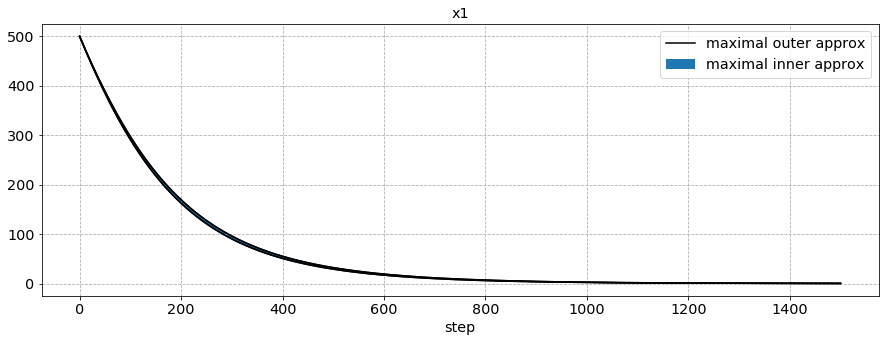

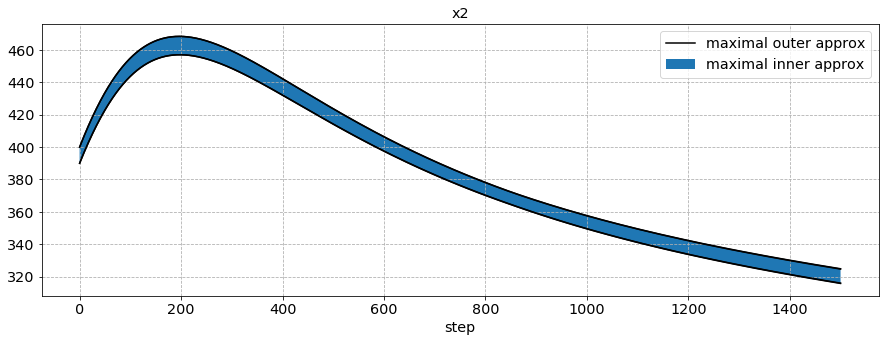

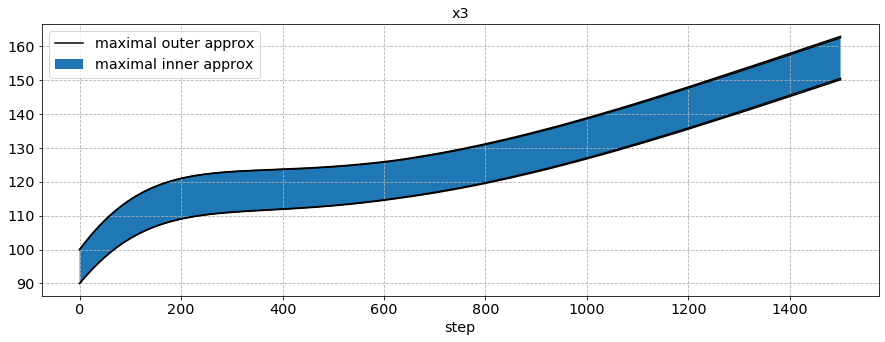

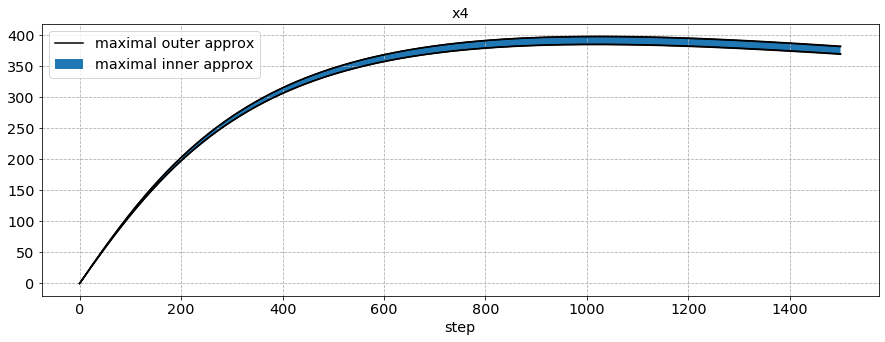

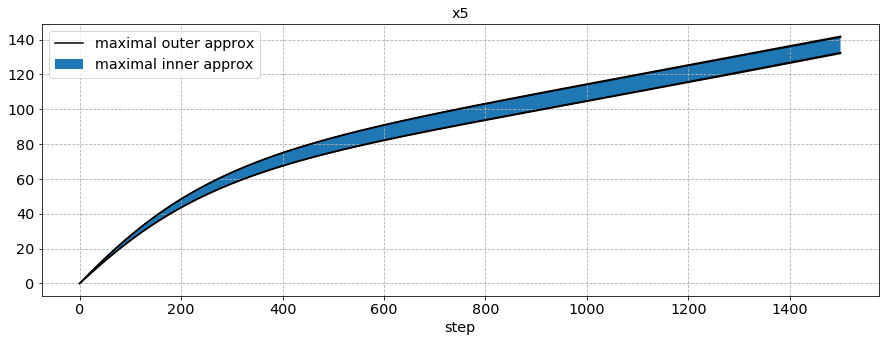

<Figure size 1080x360 with 0 Axes>

In [946]:
print_robust = True
print_minimal = False
only_one_graph = False
subplots = False
print_interactive = True
variables_to_display ="all"

my_function(print_robust,print_minimal,only_one_graph,subplots,print_interactive,variables_to_display)